# **JIRA_ISSUES**

This notebook the description of the table `JIRA_ISSUES`.

First, we import the libraries we need and, then, we read the corresponding csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

jiraIssues = pd.read_csv("../../data/raw/JIRA_ISSUES.csv")
jiraIssues.shape

/Users/laiaalborszumel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(67427, 28)

We show the first rows of the table to get an idea of its content.

In [2]:
jiraIssues.loc[0:4]

,projectID,key,creationDate,resolutionDate,updateDate,dueDate,resolution,type,priority,fixVersions,...,componentDescription,description,summary,watchCount,votes,labels,creatorName,creatorActive,assignee,reporter
0,commons-exec,EXEC-108,2018-09-18T11:15:58.000+0000,NaN,2018-09-18T11:15:58.000+0000,NaN,NaN,Bug,Major,NaN,...,NaN,When using Apache Exec to execute the followin...,Compatibility problem with Android ADB,1.0,NaN,NaN,natanieljr,True,NaN,natanieljr
1,commons-exec,EXEC-107,2018-07-04T12:09:47.000+0000,NaN,2018-07-04T12:09:47.000+0000,NaN,NaN,New Feature,Major,NaN,...,NaN,"Hi,\r\n\r\nI would like to start an independen...",Start independent process,1.0,NaN,NaN,stefanreich,True,NaN,stefanreich
2,commons-exec,EXEC-106,2018-03-06T11:32:51.000+0000,NaN,2018-03-09T15:50:48.000+0000,NaN,NaN,Improvement,Major,NaN,...,NaN,It looks like the Watchdog class could use vol...,Watchdog class could use volatile instead of s...,1.0,NaN,NaN,sebb,True,NaN,sebb
3,commons-exec,EXEC-105,2018-02-16T13:47:10.000+0000,NaN,2018-02-16T15:37:12.000+0000,NaN,NaN,Wish,Trivial,NaN,...,NaN,I want to apologize if this issue is not corre...,Small mistakes in the documentation for Apache...,2.0,NaN,NaN,IP,True,NaN,IP
4,commons-exec,EXEC-104,2017-08-04T11:57:39.000+0000,NaN,2017-08-04T11:57:39.000+0000,NaN,NaN,Bug,Major,NaN,...,NaN,[Travis CI reveals the following test failures...,"Test failure ""Exec34Test.testExec34_2:88 Watch...",1.0,NaN,NaN,krichter,True,NaN,krichter


Next, for each attribute, we obtain some information.

In some cases, we do not plot anything because there are lots of unique values of which we are not interested in the distribution, as they are categorical values.

## projectID

In [3]:
pd.unique(jiraIssues["projectID"])

array(['commons-exec', 'accumulo', 'ambari', 'atlas', 'aurora', 'batik',
       'commons-bcel', 'beam', 'commons-beanutils', 'commons-cli',
       'cocoon', 'commons-codec', 'commons-collections',
       'commons-configuration', 'commons-daemon', 'commons-dbcp',
       'commons-dbutils', 'commons-digester', 'felix',
       'commons-fileupload', 'httpcomponents-client',
       'httpcomponents-core', 'commons-io', 'commons-jelly',
       'commons-jexl', 'commons-jxpath', 'commons-net', 'commons-ognl',
       'santuario', 'mina-sshd', 'commons-validator', 'commons-vfs',
       'zookeeper'], dtype=object)

<BarContainer object of 33 artists>

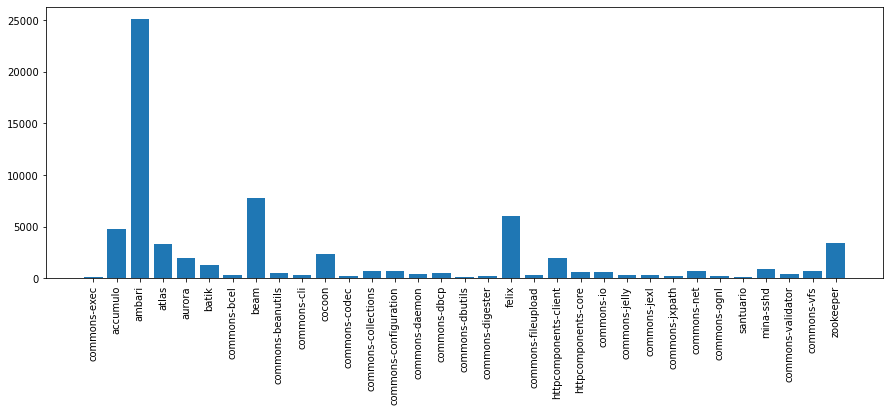

In [4]:
d = {}
for p in jiraIssues["projectID"]:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## creationDate

In [5]:
creationDate = jiraIssues["creationDate"]
creationDate[0]

'2018-09-18T11:15:58.000+0000'

In [6]:
min(creationDate)

'2001-01-22T14:46:21.000+0000'

In [7]:
max(creationDate)

'2019-07-16T10:38:29.000+0000'

In [8]:
creationDateYear = jiraIssues.creationDate.str[:4]
pd.unique(creationDateYear).size

19

<BarContainer object of 19 artists>

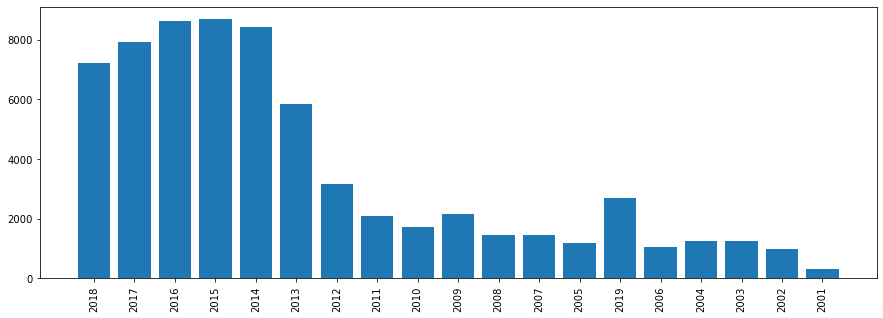

In [9]:
d = {}
for p in creationDateYear:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## resolutionDate

In [10]:
resolutionDate = jiraIssues["resolutionDate"]
resolutionDate

0                                 NaN
1                                 NaN
2                                 NaN
3                                 NaN
4                                 NaN
                     ...             
67422    2008-10-17T00:24:34.000+0000
67423    2008-09-09T21:09:01.000+0000
67424    2009-11-18T17:48:01.000+0000
67425    2008-08-25T21:13:14.000+0000
67426    2008-06-12T17:54:36.000+0000
Name: resolutionDate, Length: 67427, dtype: object

Nombre de NaNs i no NaNs:

In [11]:
nans = resolutionDate.isna().sum()
nans

10705

In [12]:
resolutionDateNew = resolutionDate[resolutionDate.notnull()]
notnans = resolutionDateNew.count()

([<matplotlib.patches.Wedge at 0x7fe6b4218e20>,
 [Text(0.9659873190671443, 0.5261829524048375, 'NaN'),
  Text(-0.9659873436995449, -0.526182907183707, 'timestamp')])

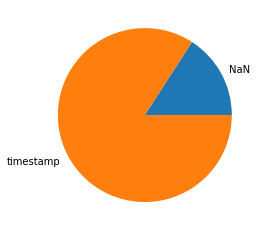

In [13]:
labels = 'NaN', 'timestamp'
plt.pie([nans, notnans], labels=labels)

In [14]:
min(resolutionDateNew)

'2002-08-22T12:26:40.000+0000'

In [15]:
max(resolutionDateNew)

'2019-07-16T10:30:04.000+0000'

In [16]:
resolutionDateYear = resolutionDateNew.str[:4]
pd.unique(resolutionDateYear).size

18

<BarContainer object of 18 artists>

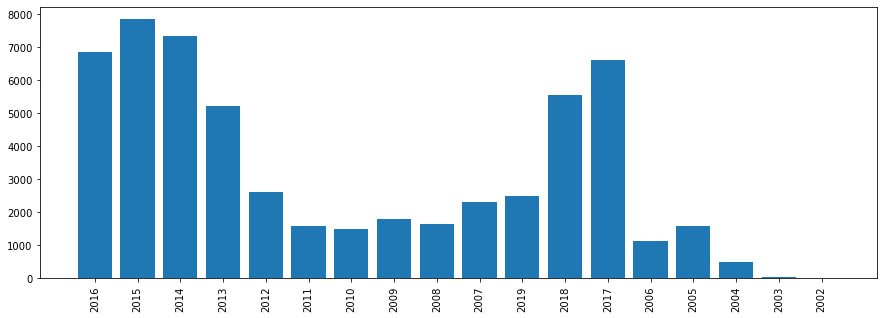

In [17]:
d = {}
for p in resolutionDateYear:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## type

In [18]:
jiraIssues["type"]

0                Bug
1        New Feature
2        Improvement
3               Wish
4                Bug
            ...     
67422    New Feature
67423            Bug
67424            Bug
67425            Bug
67426           Task
Name: type, Length: 67427, dtype: object

In [19]:
pd.unique(jiraIssues["type"]).size

13

<BarContainer object of 13 artists>

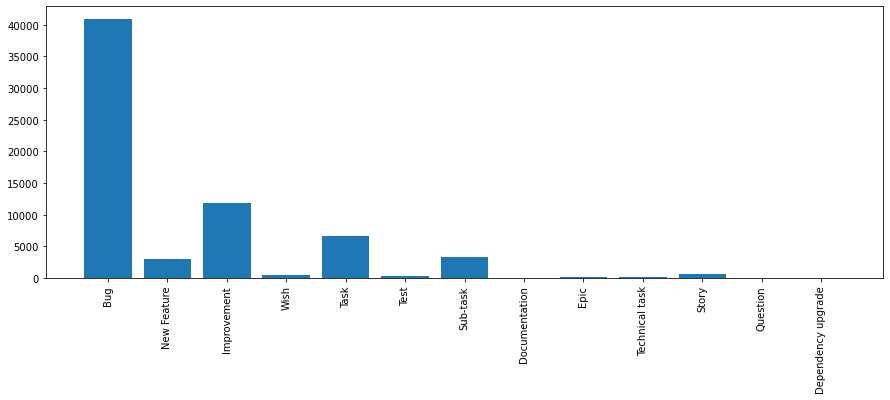

In [20]:
d = {}
for p in jiraIssues["type"]:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## priority

In [21]:
priority = jiraIssues["priority"]
pd.unique(priority)

array(['Major', 'Trivial', 'Minor', 'Critical', 'Blocker', nan],
      dtype=object)

Number of NaNs and no-NaNs:

In [22]:
nans = priority.isna().sum()
nans

1082

In [23]:
priorityNew = priority[priority.notnull()]
notnans = priorityNew.count()

([<matplotlib.patches.Wedge at 0x7fe6b62eef40>,
 [Text(1.0986024823566232, 0.055430909787459605, 'NaN'),
  Text(-1.0986024852758933, -0.05543085192950356, 'value')])

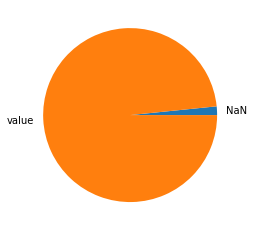

In [24]:
labels = 'NaN', 'value'
plt.pie([nans, notnans], labels=labels)

<BarContainer object of 5 artists>

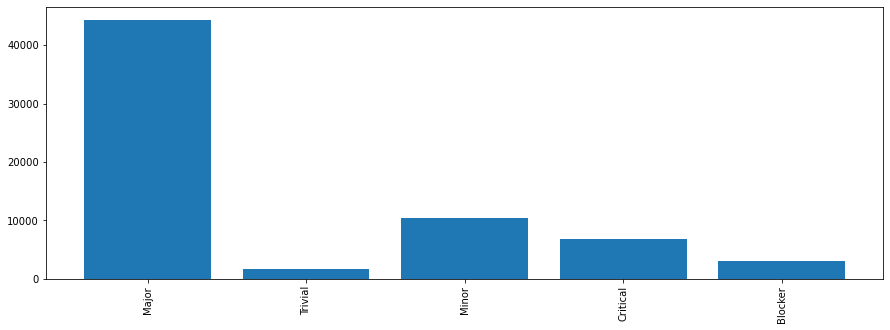

In [25]:
d = {}
for p in priorityNew:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## votes

In [26]:
votes = jiraIssues["votes"]

In [27]:
pd.unique(votes)

array([nan,  1.,  3.,  2.,  5.,  7.,  4.,  9.,  8.,  6., 25., 10., 38.,
       12., 66., 11., 20., 16., 23., 32., 29., 26., 13., 28.])

Number of NaNs and no-NaNs:

In [28]:
nans = votes.isna().sum()
nans

64489

In [29]:
votesNew = votes[votes.notnull()]
notnans = votesNew.count()

([<matplotlib.patches.Wedge at 0x7fe6b646dee0>,
 [Text(-1.0897099017798315, 0.15010772785899554, 'NaN'),
  Text(1.089709914077165, -0.15010763858624188, 'value')])

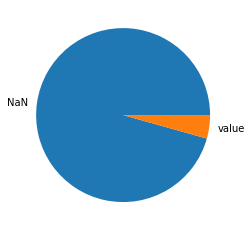

In [30]:
labels = 'NaN', 'value'
plt.pie([nans, notnans], labels=labels)

<BarContainer object of 23 artists>

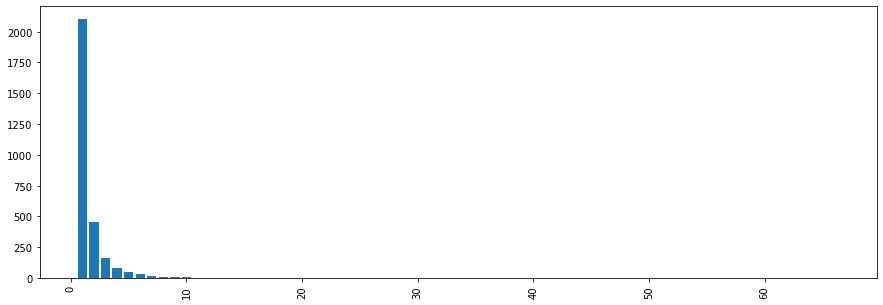

In [31]:
d = {}
for p in votesNew:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## assignee

In [32]:
assignee = jiraIssues["assignee"]
pd.unique(assignee)

array([nan, 'sgoeschl', 'ggregory', ..., 'jghoman', 'anthonyu', 'akornev'],
      dtype=object)

In [33]:
pd.unique(assignee).size

1511

In [34]:
nans = assignee.isna().sum()
nans

19698

In [35]:
assigneeNew = assignee[assignee.notnull()]
notnans = assigneeNew.count()

([<matplotlib.patches.Wedge at 0x7fe6b68bc400>,
 [Text(0.6683441783905629, 0.8736796090166256, 'NaN'),
  Text(-0.6683441783905634, -0.8736796090166251, 'value')])

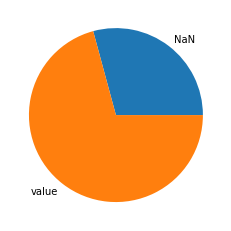

In [36]:
labels = 'NaN', 'value'
plt.pie([nans, notnans], labels=labels)

## reporter

In [37]:
reporter = jiraIssues["reporter"]
pd.unique(reporter)

array(['natanieljr', 'stefanreich', 'sebb', ..., 'md87', 'markh',
       'akornev'], dtype=object)

In [38]:
pd.unique(reporter).size

10866

In [39]:
nans = reporter.isna().sum()
nans

0

## assignee & reporter

In [40]:
count = 0
for a in pd.unique(assignee):
  if a not in pd.unique(reporter):
    count += 1

count

190